# Here we will be Analysing company sales and making predictions to help manage inventory

## What data can be derived from the file?
- Overall sales trend?
- Top 10 most selling business units and product families?
- Most preferred Business Unit or and Product Family?
- Fiscal Year wise sales
- Predicting the next Fiscal Quarter's Booked_Qty

In [1]:
# Importing pandas, numpy and math will help in managing the 
#       datasets and performing operations on them easy
import pandas as pd
import numpy as np
import math

# Using LabelEncoder we can give same integer labels 
#       to string characters of similar type
from sklearn.preprocessing import LabelEncoder

# Matplotlib will help in data visualisation
import matplotlib.pyplot as plt

# train_test_split will help in dividing the dataset into 
#       2 datasets for training and testing
from sklearn.model_selection import train_test_split

# With MinMaxScaler, we will scale the data to a range for 
#       better management of the dataset values
from sklearn.preprocessing import MinMaxScaler

# Importing LinearRegression and Sequential models 
#     for building ML models to predict future data
from keras.models import Sequential
from keras.layers import Dense,LSTM

## Cleaning the data

In [2]:
# Storing the data in df using pandas' readd_csv function
df = pd.read_csv("PLID_Bookings_Problem1.csv")
df

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,01-08-2016
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,01-10-2016
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,01-09-2016
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,01-08-2017
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,01-10-2017
...,...,...,...,...,...,...,...
10991,RTOBU,C980040,C9800-40-K9,Q4 FY2011,JUN FY2011,229,01-06-2020
10992,RTOBU,C980040,C9800-40-K9,Q4 FY2011,MAY FY2011,289,01-05-2020
10993,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUL FY2012,1231,01-07-2021
10994,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUN FY2012,591,01-06-2021


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Business Unit   10996 non-null  object
 1   Product Family  10996 non-null  object
 2   PLID            10996 non-null  object
 3   Fiscal Quarter  10996 non-null  object
 4   Fiscal Month    10996 non-null  object
 5   Booked_Qty      10996 non-null  int64 
 6   Booking_Date    10996 non-null  object
dtypes: int64(1), object(6)
memory usage: 601.5+ KB


As you can see above, the Booking_Date column in of object datatype. So we will change it to datetime64[ns]

In [4]:
# astype helps to convert datatypes of a column 
df['Booking_Date'] = df['Booking_Date'].astype('datetime64[ns]')

In [5]:
# isnull() helps to check if there are any 
#       null values in any of the columns
df.isnull().sum()

Business Unit     0
Product Family    0
PLID              0
Fiscal Quarter    0
Fiscal Month      0
Booked_Qty        0
Booking_Date      0
dtype: int64

As you can see above, there is no null values in any of the columns

In [6]:
# Here you can see the description of the data in df
df.describe()

,Booked_Qty
count,10996.000000
mean,7068.159694
std,18819.530678
min,0.000000
25%,154.750000
50%,835.000000
75%,3829.500000
max,322807.000000


In [7]:
# columns is an attribute which outputs the columns in the dataset df
df.columns

Index(['Business Unit', 'Product Family', 'PLID', 'Fiscal Quarter',
       'Fiscal Month', 'Booked_Qty', 'Booking_Date'],
      dtype='object')

#### What is the overall Sales Trend?

The data available is between the following two dates

In [8]:
df['Booking_Date'].min()

Timestamp('2013-01-01 00:00:00')

In [9]:
df['Booking_Date'].max()

Timestamp('2022-01-12 00:00:00')

In [10]:
#Getting month year from the dataset
df['month_year'] = df['Booking_Date'].apply(lambda x: x.strftime('%Y-%d'))

In [11]:
df_trend = df.groupby('month_year').sum()['Booked_Qty'].reset_index()

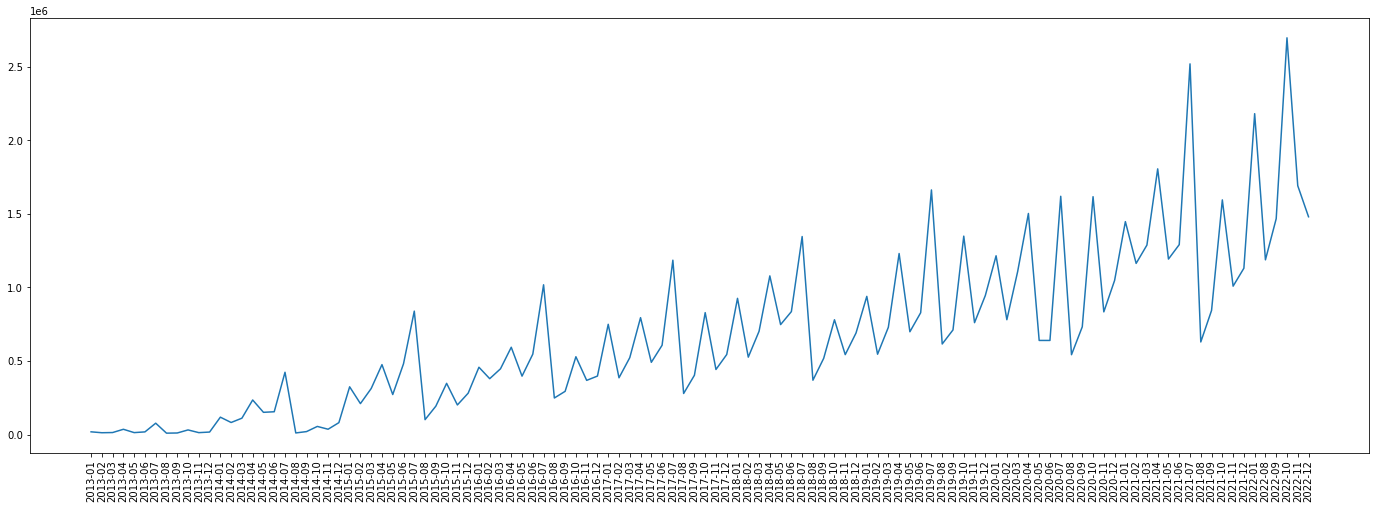

In [12]:
# Here we are plotting the booked_qty data against the months
plt.figure(figsize = (24,8))
plt.plot(df_trend['month_year'], df_trend['Booked_Qty'])
plt.xticks(rotation = 'vertical')
plt.show()

 As you can see above, the sales increase from 
 January to July each year then reduces drastically.
 But overall, the sales are increasing.

So according to observation, the future sales should increase

#### What are the top 10 most selling business units and product families?

In [14]:
# Grouping the data by 'Business Unit' and 'Product Family' columns and summing the values
Business_Unit = pd.DataFrame(df.groupby('Business Unit').sum()['Booked_Qty'])
Product_Family = pd.DataFrame(df.groupby('Product Family').sum()['Booked_Qty'])

In [15]:
# Sorting the values in decreasing order
Business_Unit = Business_Unit.sort_values('Booked_Qty', ascending = False)
Product_Family = Product_Family.sort_values('Booked_Qty', ascending = False)

In [16]:
Business_Unit[:10]

,Booked_Qty
Business Unit,
UCEBU,33175312
TOASTBU,19975582
UOPBLRBU,6510578
RTOBU,5306914
CSA,4761323
SRSBU,3814993
ECBU,1250146
CVEBU,856954
QKBU,574880


In [17]:
Product_Family[:10]

,Booked_Qty
Product Family,
PHONVOC,29742127
SFP10G,6880923
SFPGE,5781692
UCSMEM,3596179
C9300,3214243
QSFP40G,3054843
C9120AX,2850175
QSFP100,2833824
PHONVID,2188151


#### Which is the most preferred Business Unit or and Product Family?

In [18]:
Business_Unit[:1]

,Booked_Qty
Business Unit,
UCEBU,33175312


In [19]:
Product_Family[:1]

,Booked_Qty
Product Family,
PHONVOC,29742127


#### Fiscal Quarterwise sales

Here we will see how the inventory changes in a particular quarter of each year

In [20]:
df_quarter_trend = df.groupby('Fiscal Quarter').sum()['Booked_Qty'].reset_index()
Fiscal_Quarter_1 = df_quarter_trend[:9]
Fiscal_Quarter_2 = df_quarter_trend[9:18]
Fiscal_Quarter_3 = df_quarter_trend[18:27]
Fiscal_Quarter_4 = df_quarter_trend[27:35]

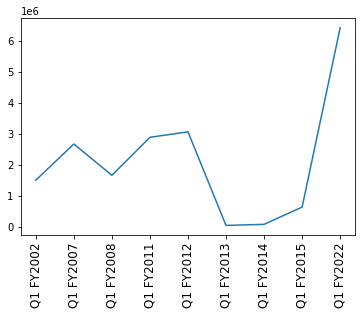

In [21]:
# Quarter 1
plt.plot(Fiscal_Quarter_1['Fiscal Quarter'], Fiscal_Quarter_1['Booked_Qty'])
plt.xticks(rotation = 'vertical', fontsize=12)
plt.show()

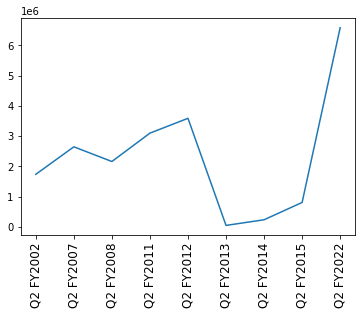

In [22]:
# Quarter 2
plt.plot(Fiscal_Quarter_2['Fiscal Quarter'], Fiscal_Quarter_2['Booked_Qty'])
plt.xticks(rotation = 'vertical', fontsize=12)
plt.show()

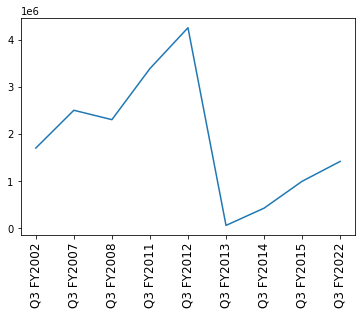

In [23]:
# Quarter 3
plt.plot(Fiscal_Quarter_3['Fiscal Quarter'], Fiscal_Quarter_3['Booked_Qty'])
plt.xticks(rotation = 'vertical', fontsize=12)
plt.show()

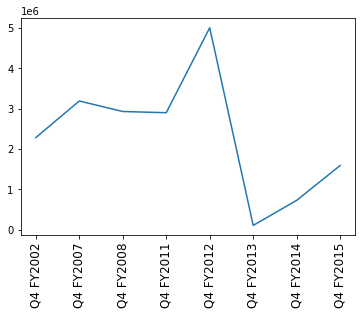

In [24]:
# Quarter 4
plt.plot(Fiscal_Quarter_4['Fiscal Quarter'], Fiscal_Quarter_4['Booked_Qty'])
plt.xticks(rotation = 'vertical', fontsize=12)
plt.show()

In [25]:
# Now we see how the inventory changes after each quarter
Overall_FiscallQuarter_Sales = {}
for i in range(9):
    Overall_FiscallQuarter_Sales[Fiscal_Quarter_1['Fiscal Quarter'][i]] = [Fiscal_Quarter_1['Booked_Qty'][i]]
    Overall_FiscallQuarter_Sales[Fiscal_Quarter_2['Fiscal Quarter'][9+i]] = [Fiscal_Quarter_2['Booked_Qty'][9+i]]
    Overall_FiscallQuarter_Sales[Fiscal_Quarter_3['Fiscal Quarter'][18+i]] = [Fiscal_Quarter_3['Booked_Qty'][18+i]]
    if(i==8):
        break
    Overall_FiscallQuarter_Sales[Fiscal_Quarter_4['Fiscal Quarter'][27+i]] = [Fiscal_Quarter_4['Booked_Qty'][27+i]]

In [26]:
# Converting dictionary into dataframe and then taking transpose
df_fiscalquarter_sales = pd.DataFrame.from_dict(Overall_FiscallQuarter_Sales)
df_fiscalquarter_sales = df_fiscalquarter_sales.T

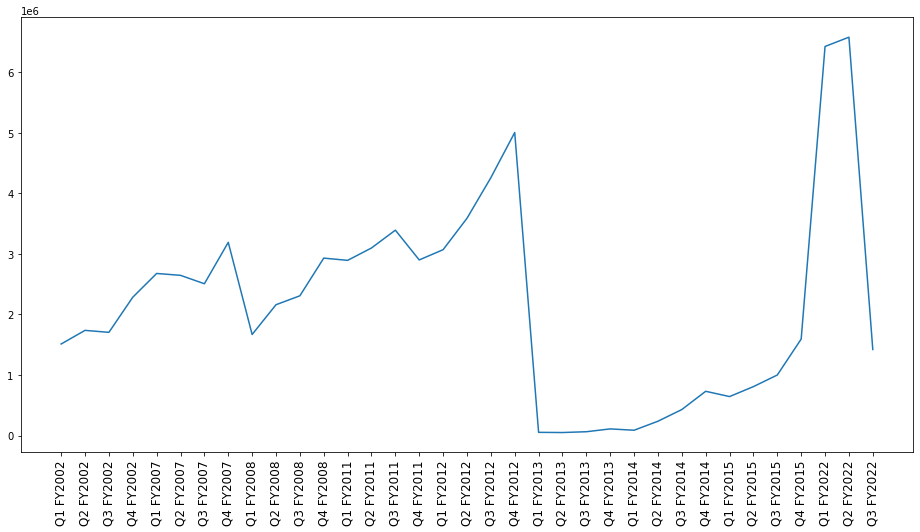

In [27]:
plt.figure(figsize=(16,8))
plt.plot(df_fiscalquarter_sales)
plt.xticks(rotation = 'vertical', fontsize=12)
plt.show()

As you can see above, the the inventory had a dractic drop after the 4th quarter of 2012.

Also you can see there is data missing between 2015 and 2022

## Prediction of the future sales

##### Using Linear Regression

In [29]:
# Converting the 'Booking_Date' from datetime64[ns] to int64, 
#           so that it can be used for training the model
df['Booking_Date'] = pd.to_numeric(pd.to_datetime(df['Booking_Date']))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Business Unit   10996 non-null  object
 1   Product Family  10996 non-null  object
 2   PLID            10996 non-null  object
 3   Fiscal Quarter  10996 non-null  object
 4   Fiscal Month    10996 non-null  object
 5   Booked_Qty      10996 non-null  int64 
 6   Booking_Date    10996 non-null  int64 
 7   month_year      10996 non-null  object
dtypes: int64(2), object(6)
memory usage: 687.4+ KB


In [30]:
model_linear_regression = LinearRegression()

# Splitting the dataset into training and testing datasets with training to testing ratio = 7:3
x_train, x_test, y_train, y_test = train_test_split(df[['Booking_Date']], df['Booked_Qty'], train_size = 0.7)

# Training the model using x_train and y_train
model_linear_regression.fit(x_train, y_train)

LinearRegression()

In [31]:
# Score represents how a model performed when it was given some new data
model_linear_regression.score(x_test, y_test)

0.01037465107943647

As you can see, LinearRegression clearly cannot be used as it predicts data very badly. This is bcause it does not have long term memory.

##### LSTM

Using LSTM because it has the capability to retain long term memory

In [33]:
df['Booking_Date'] = pd.to_datetime(df['Booking_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10996 entries, 0 to 10995
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Business Unit   10996 non-null  object        
 1   Product Family  10996 non-null  object        
 2   PLID            10996 non-null  object        
 3   Fiscal Quarter  10996 non-null  object        
 4   Fiscal Month    10996 non-null  object        
 5   Booked_Qty      10996 non-null  int64         
 6   Booking_Date    10996 non-null  datetime64[ns]
 7   month_year      10996 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 687.4+ KB


In [34]:
df

,Business Unit,Product Family,PLID,Fiscal Quarter,Fiscal Month,Booked_Qty,Booking_Date,month_year
0,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,AUG FY2022,204,2016-01-08,2016-08
1,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,OCT FY2022,564,2016-01-10,2016-10
2,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2022,SEP FY2022,1476,2016-01-09,2016-09
3,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,AUG FY2002,374,2017-01-08,2017-08
4,CSWBU,CBR8,CBR-D121-DS-MOD,Q1 FY2002,OCT FY2002,6094,2017-01-10,2017-10
...,...,...,...,...,...,...,...,...
10991,RTOBU,C980040,C9800-40-K9,Q4 FY2011,JUN FY2011,229,2020-01-06,2020-06
10992,RTOBU,C980040,C9800-40-K9,Q4 FY2011,MAY FY2011,289,2020-01-05,2020-05
10993,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUL FY2012,1231,2021-01-07,2021-07
10994,RTOBU,C980040,C9800-40-K9,Q4 FY2012,JUN FY2012,591,2021-01-06,2021-06


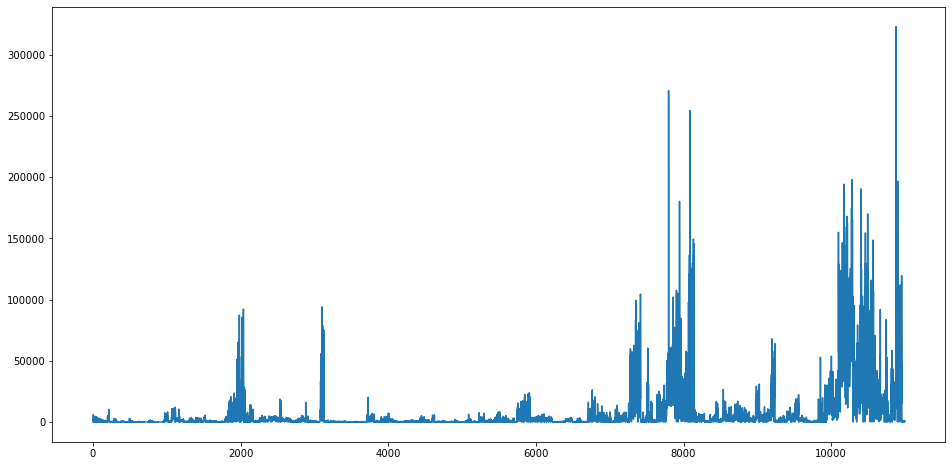

In [35]:
plt.figure(figsize=(16,8))
plt.plot(df['Booked_Qty'])
plt.show()

### Creating dataset for model to train

In [36]:
# Storing booked quantity data values in dataset
data = df.filter(['Booked_Qty'])
dataset = data.values

# Here we will be using 80% data to train 
#      and the remaining to test
training_data_len = math.ceil( len(dataset)*(0.8))

training_data_len

8797

In [37]:
# Scaling the booked quantity data is important otherwise 
#         we might get skewed results
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00063196],
       [0.00174717],
       [0.00457239],
       ...,
       [0.00381342],
       [0.00183082],
       [0.00186179]])

In [38]:
# Storing the data which we will be using for 
#         training in x_train and y_train
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

In [39]:
# Converting the lists into numpy arrays and reshaping them
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(8737, 60, 1)

In [40]:
# Training the model for predicting data using Sequential
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

8737/8737 [==============================] - 343s 39ms/step - loss: 8.3296e-04


In [43]:
# Testing data created using the remaining values of the dataset
test_data = scaled_data[training_data_len - 60:, :]

# Here what we are doing is, first we make a set of 60 dataset values
#      and then using the 61st dataset value as the 'to be predicted data'
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [44]:
x_test = np.array(x_test)
x_test

array([[0.00083022, 0.01504924, 0.02049522, ..., 0.03607109, 0.01721772,
        0.00404886],
       [0.01504924, 0.02049522, 0.01413848, ..., 0.01721772, 0.00404886,
        0.00631647],
       [0.02049522, 0.01413848, 0.02600006, ..., 0.00404886, 0.00631647,
        0.0019888 ],
       ...,
       [0.13017066, 0.34689768, 0.15545821, ..., 0.0021375 , 0.0007094 ,
        0.00089527],
       [0.34689768, 0.15545821, 0.03273783, ..., 0.0007094 , 0.00089527,
        0.00381342],
       [0.15545821, 0.03273783, 0.02651429, ..., 0.00089527, 0.00381342,
        0.00183082]])

In [45]:
# x_test dataset is reshapd so that it can be predicted using the model
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [46]:
# storing the values predicted using the x_test dataset in predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

69/69 [==============================] - 3s 26ms/step


In [47]:
# Calculating the root mean square error(rsme) the 
#        predicted datset and real valuesrmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1687.5207113185327

Low error means that the model was trained perfectly and is able to give pretty good results

The error is not that good, but still quite better thant LinearRegression

C:\Users\Amit Jha\AppData\Local\Temp\ipykernel_27520\1484864037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['PREDICTIONS'] = predictions


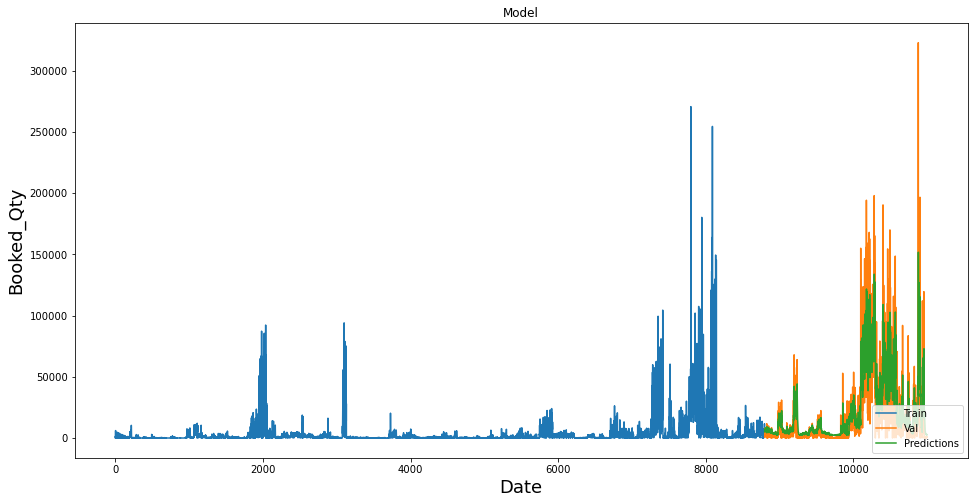

In [48]:
# Now we will plot the original data and the data predicted
#     side by side so that we can see the accuracy of the model
train = data[:training_data_len]
valid = data[training_data_len:]
valid['PREDICTIONS'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Booked_Qty', fontsize=18)
plt.plot(train['Booked_Qty'])
plt.plot(valid[['Booked_Qty', 'PREDICTIONS']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [49]:
# Here we can see the data predicted along with the original data
valid['DATE'] = df.Booking_Date[8797:]
valid

C:\Users\Amit Jha\AppData\Local\Temp\ipykernel_27520\1352023030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['DATE'] = df.Booking_Date[8797:]


,Booked_Qty,PREDICTIONS,DATE
8797,2039,5253.115723,2018-01-01
8798,642,5198.248535,2018-01-11
8799,5074,4855.535156,2019-01-12
8800,4471,6605.924805,2019-01-01
8801,4130,6746.142090,2019-01-11
...,...,...,...
10991,229,2748.687256,2020-01-06
10992,289,2587.894287,2020-01-05
10993,1231,2543.063232,2021-01-07
10994,591,2928.906738,2021-01-06


### Predicting the future 30 days data paoints

In [50]:
len(x_test)

2199

In [51]:
# Storing the last data set from the x_test in x_input
x_input = x_test[2198].reshape(1,-1)
x_input.shape

(1, 60)

In [52]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.15545821497055518,
 0.0327378278661863,
 0.02651429491925516,
 0.010637935360757357,
 0.07474125406202468,
 0.11481163667454548,
 0.0921262550068617,
 0.16834827001892771,
 0.29196702673733843,
 0.30005545108997017,
 0.08091831961512608,
 0.019720761941345758,
 0.03998054565111661,
 0.22260050122828812,
 0.08913685267048113,
 0.14843544284975232,
 0.10714451669263678,
 0.04579826335860127,
 0.048564622204599034,
 0.37022741142540283,
 0.1595411499750625,
 0.17946327062300385,
 0.0005947826410207958,
 0.0009789130966800597,
 0.0004522826332762301,
 0.000662934818637762,
 0.0015179348651051558,
 0.0008023370001270109,
 0.001821521838126187,
 0.004529021985272934,
 0.0017100000929347878,
 0.00010222826642544927,
 0.00012391305021266578,
 3.0978262553166445e-06,
 0.001177173977020325,
 0.0011059239731480422,
 0.0008023370001270109,
 0.0014652718187647728,
 0.002066250112296202,
 0.0017285870504666876,
 0.0016604348728497214,
 0.003215543653018677,
 0.0023760327378278662,
 0.000408913065

Now what we will do is, we use the last 60 datapoints to predict the 61st datapoint and add it to the list. Then again use the last 60 points, removing the 1st point, and predict data for the 62nd point. And so on, we can predict the next 30 fiscal quarters

In [53]:
from numpy import array
lst_output = []
n_steps = 60
i = 0
while(i<30):
    
    if(len(temp_input)>60):
        x_input=np.array(temp_input[1:])
        print("{} fiscal quarter input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} fiscal quarter output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.00856414]
61
1 day input [3.27378279e-02 2.65142949e-02 1.06379354e-02 7.47412541e-02
 1.14811637e-01 9.21262550e-02 1.68348270e-01 2.91967027e-01
 3.00055451e-01 8.09183196e-02 1.97207619e-02 3.99805457e-02
 2.22600501e-01 8.91368527e-02 1.48435443e-01 1.07144517e-01
 4.57982634e-02 4.85646222e-02 3.70227411e-01 1.59541150e-01
 1.79463271e-01 5.94782641e-04 9.78913097e-04 4.52282633e-04
 6.62934819e-04 1.51793487e-03 8.02337000e-04 1.82152184e-03
 4.52902199e-03 1.71000009e-03 1.02228266e-04 1.23913050e-04
 3.09782626e-06 1.17717398e-03 1.10592397e-03 8.02337000e-04
 1.46527182e-03 2.06625011e-03 1.72858705e-03 1.66043487e-03
 3.21554365e-03 2.37603274e-03 4.08913066e-04 1.05326093e-04
 1.35994573e-03 1.58298922e-03 8.58097873e-04 1.00369571e-03
 2.61146753e-03 1.35375007e-03 1.71309792e-03 1.87418488e-03
 5.73097857e-04 9.26250050e-04 2.13750012e-03 7.09402212e-04
 8.95271788e-04 3.81342412e-03 1.83081532e-03 8.56413506e-03]
1 day output [[0.01116881]]
2 day input [2.65142949e-02 

In [54]:
day_new=np.arange(1,61)
day_pred=np.arange(61,91)

In [55]:
len(dataset)

10996

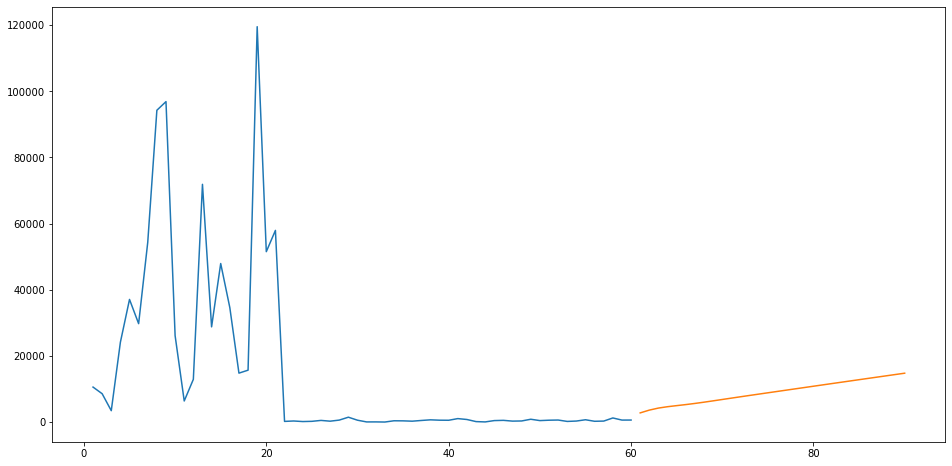

In [56]:
# Plotting the available and the predicted data points
plt.figure(figsize = (16,8))
plt.plot(day_new,(dataset[10936:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

Here we can see the increase in booked_qty

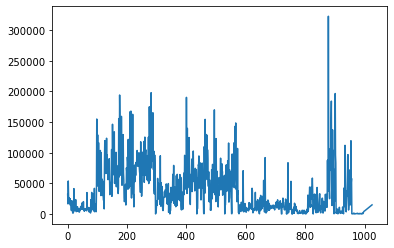

In [57]:
# Now we will just combine the 2 graphs and plot it together

df3=dataset.tolist()
df3.extend(scaler.inverse_transform(lst_output))
plt.plot(df3[10000:])